In [262]:
import pandas as pd
import numpy as np
import datetime as dt
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6
from patsy import dmatrices
from datetime import datetime

import statsmodels.api as sm
#figure(num=None, figsize=(16,12),dpi = 80,facecolor = 'w',edgecolor = 'k')
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt

import sys
import warnings
import itertools
warnings.filterwarnings('ignore')


import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.arima_model import ARIMA


In [263]:
data = pd.read_csv('AirPassengers.csv')
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [264]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [265]:
data['Month'] = pd.to_datetime(data['Month'],infer_datetime_format = True) #convert string to datetime
data = data.set_index(['Month'])
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [266]:
data.dtypes

#Passengers    int64
dtype: object

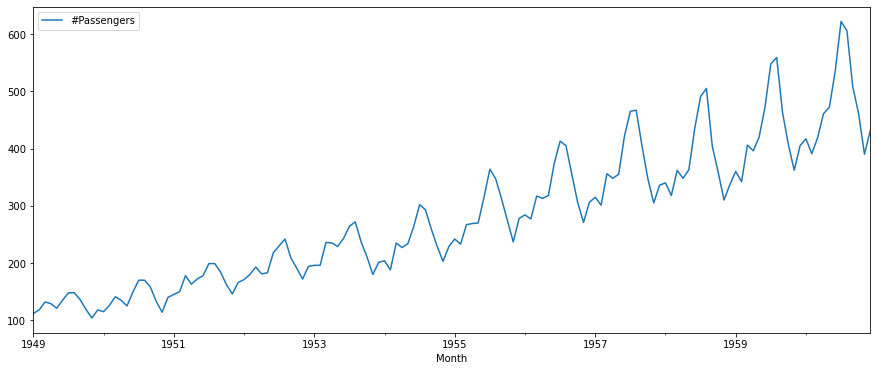

In [267]:
data.plot()

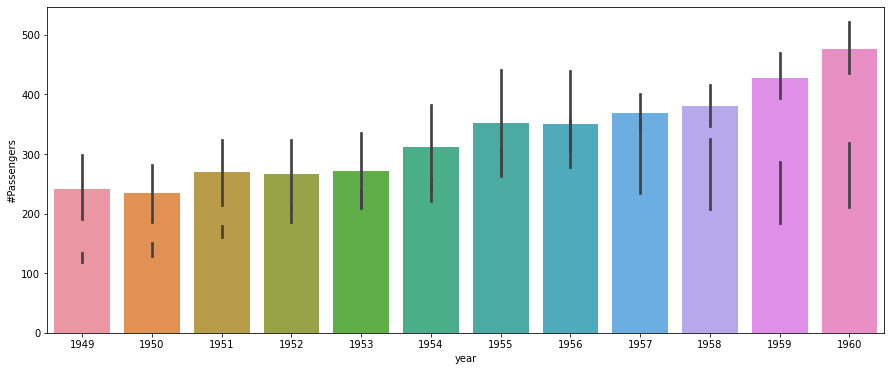

In [268]:
import seaborn as sns
data['year']= [d.year for d in data.index]
data['month']= [d.strftime('%b') for d in data.index]
sns.barplot(x = data['month'],y = data['#Passengers'],data = data)
sns.barplot(x = data['year'],y = data['#Passengers'],data = data)

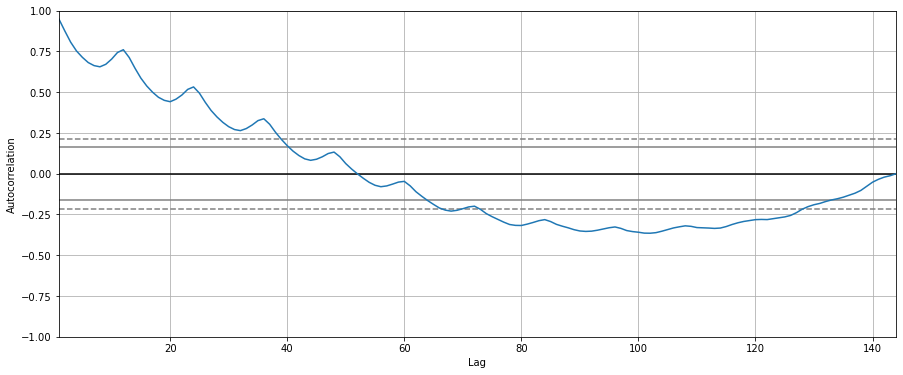

In [269]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data['#Passengers'])

ConversionError: Failed to convert value(s) to axis units: array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar',
       'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec',
       'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar',
       'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec',
       'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar',
       'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec',
       'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar',
       'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
      dtype=object)

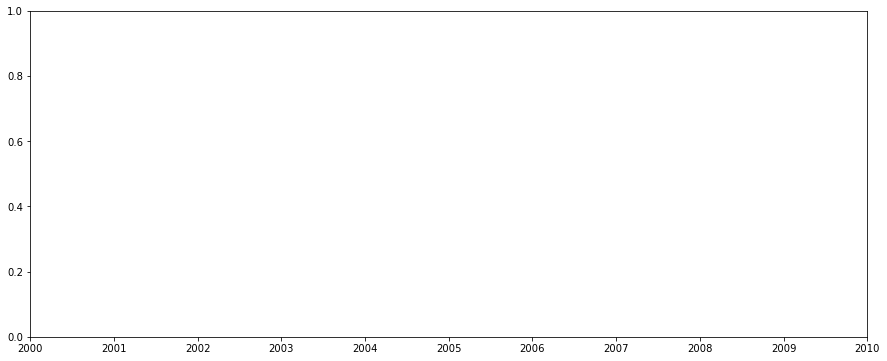

In [270]:
def plot(data):
    rolling_mean = data.rolling(window= 12).mean()
    rolling_std = data.rolling(window= 12).std()
    original = plt.plot(data,color= 'blue',label = 'original')
    mean = plt.plot(rolling_mean,color= 'red',label = 'Rolling mean')
    std = plt.plot(rolling_std,color = 'black',label = 'Rolling std')
    plt.show()

plot(data)

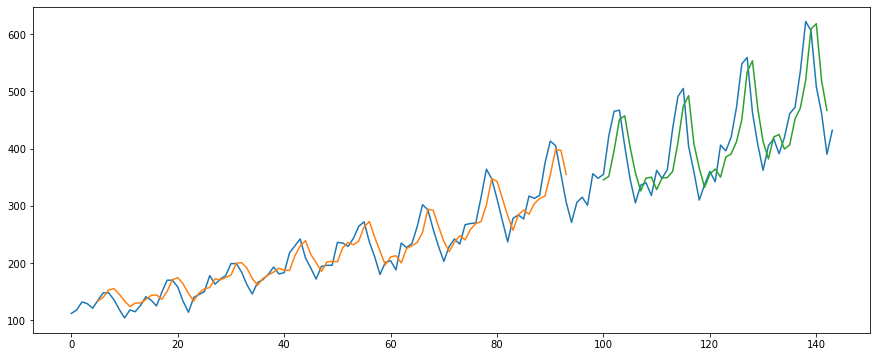

In [170]:
#we must shift the predictions so that they align on the x-axis with the original dataset. 
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[seq_size:len(trainPredict)+seq_size, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(seq_size*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()



In [26]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(data):
    result = adfuller(data)
    labels = ['ADF Test statiscs','p-value','#lags used', 'number of observations used']
    for value,label in zip(result,labels):
        print(label+':'+str(value))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. data is stationary ")
    else:
        print("weak evidence. indicating it is non stationary")
        


In [27]:
#adfuller_test(data['#Passengers'])
adfuller_test(data)

ADF Test statiscs:0.8153688792060543
p-value:0.9918802434376411
#lags used:13
number of observations used:130
weak evidence. indicating it is non stationary


In [28]:
data1 = data.diff(periods = 1)
data1.dropna(inplace = True)


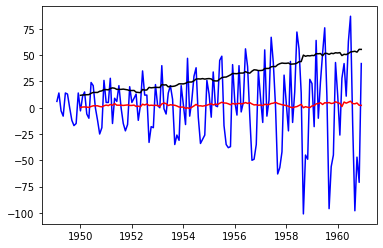

In [30]:
rolling_mean1 = data1.rolling(window= 12).mean()
rolling_std1 = data1.rolling(window= 12).std()
original1 = plt.plot(data1,color= 'blue',label = 'original')
mean1 = plt.plot(rolling_mean1,color= 'red',label = 'Rolling mean')
std1 = plt.plot(rolling_std1,color = 'black',label = 'Rolling std')

In [31]:
adfuller_test(data1)

ADF Test statiscs:-2.8292668241700034
p-value:0.05421329028382497
#lags used:12
number of observations used:130
weak evidence. indicating it is non stationary


In [32]:
data_log = np.log10(data)
data_log.dropna(inplace= True)
adfuller_test(data_log)

ADF Test statiscs:-1.7170170891070216
p-value:0.4223667747703601
#lags used:13
number of observations used:130
weak evidence. indicating it is non stationary


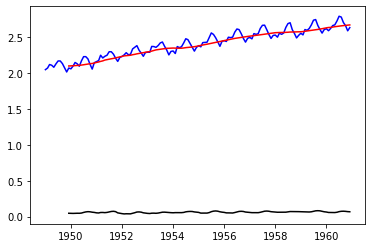

In [35]:
plot(data_log)

In [38]:
data_log_diff = data_log.diff(periods =1)
data_log_diff.dropna(inplace =True)
adfuller_test(data_log_diff)

ADF Test statiscs:-2.7171305983880965
p-value:0.07112054815086483
#lags used:14
number of observations used:128
weak evidence. indicating it is non stationary


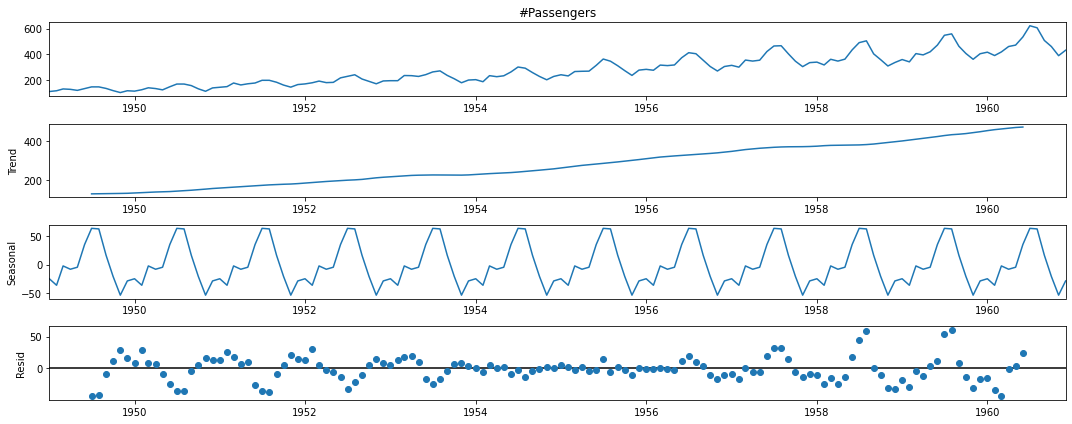

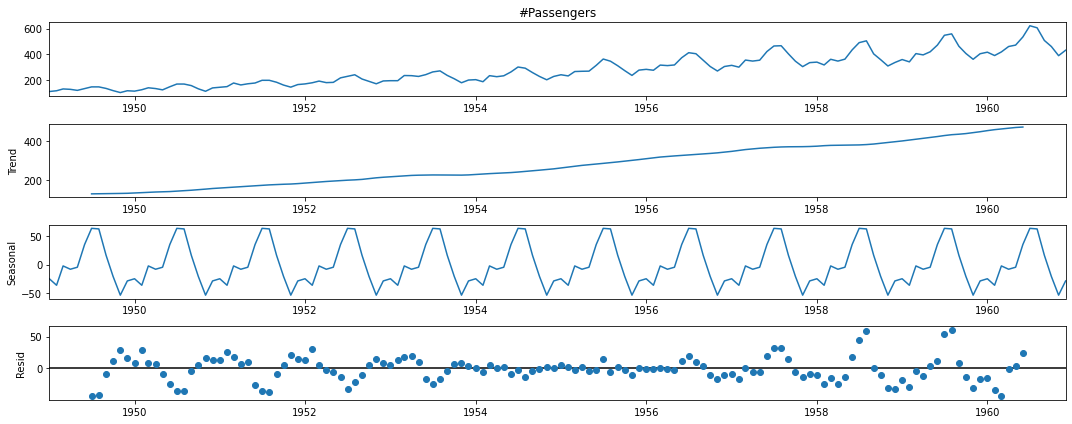

In [22]:

import statsmodels.api as sm
data_decompose = sm.tsa.seasonal_decompose(data['#Passengers'], model = 'additive',freq =12)
data_decompose.plot()

In [44]:
trend = data_decompose.seasonal
trend.head(10)

Month
1949-01-01    0.910230
1949-02-01    0.883625
1949-03-01    1.007366
1949-04-01    0.975906
1949-05-01    0.981378
1949-06-01    1.112776
1949-07-01    1.226556
1949-08-01    1.219911
1949-09-01    1.060492
1949-10-01    0.921757
Name: seasonal, dtype: float64

In [23]:
!pip install pmdarima

  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21


In [24]:
from pmdarima.arima import auto_arima
arima_model = auto_arima(data['#Passengers'],start_p = 1,d=1,start_q = 1,max_p = 5,max_q= 5,max_d = 5,m = 12,start_P = 0,D =1,start_Q = 0,max_P = 5,max_D = 5,max_Q = 5,seasonal = True, trace = True,error_action = 'ignore',suppress_warnings = True,stepwise = True,n_fits = 50)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1022.393, Time=0.24 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.30 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.66 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.12 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.89 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=1020.582, Time=1.94 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=7.57 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.84 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time=15.07 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.62 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=1.19 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=1.73 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.94 sec
 ARIMA(0,1,1)(1,1,0)[12]    

In [26]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Mon, 07 Dec 2020   AIC                           1019.178
Time:                                     14:57:17   BIC                           1030.679
Sample:                                          0   HQIC                          1023.851
                                             - 144                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      0.090     -1.372      0.170      -0.301       0.053
ar.S.L24       0.1911      0.107      1.783      0.075      -0.019       0.401
sigma2       130.4480     15.527      8.402      0.000     100.016     160.880
===================================================================================
Ljung-Box (Q):                       53.71   Jarque-Bera (JB):                 4.59
Prob(Q):                              0.07   Prob(JB):                         0.10
Heteroskedasticity (H):               2.70   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
train = data[0:int(len(data)*0.80)]
test = data[int(len(data)*0.80):]  ## splitting data for 21 months

In [34]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train['#Passengers'],order = (0,1,1),seasonal_order = (2,1,1,12))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        #Passengers   No. Observations:                  115
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -371.891
Date:                            Mon, 07 Dec 2020   AIC                            753.782
Time:                                    15:16:29   BIC                            766.907
Sample:                                01-01-1949   HQIC                           759.097
                                     - 07-01-1958                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2392      0.090     -2.646      0.008      -0.416      -0.062
ar.S.L12       0.7248      0.315      2.302      0.021       0.108       1.342
ar.S.L24       0.2741      0.099      2.779      0.005       0.081       0.467
ma.S.L12      -0.9795      3.062     -0.320      0.749      -6.981       5.022
sigma2        75.9427    208.813      0.364      0.716    -333.322     485.208
===================================================================================
Ljung-Box (Q):                       40.84   Jarque-Bera (JB):                 3.22
Prob(Q):                              0.43   Prob(JB):                         0.20
Heteroskedasticity (H):               1.04   Skew:                             0.40
Prob(H) (two-sided):                  0.90   Kurtosis:                         2.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

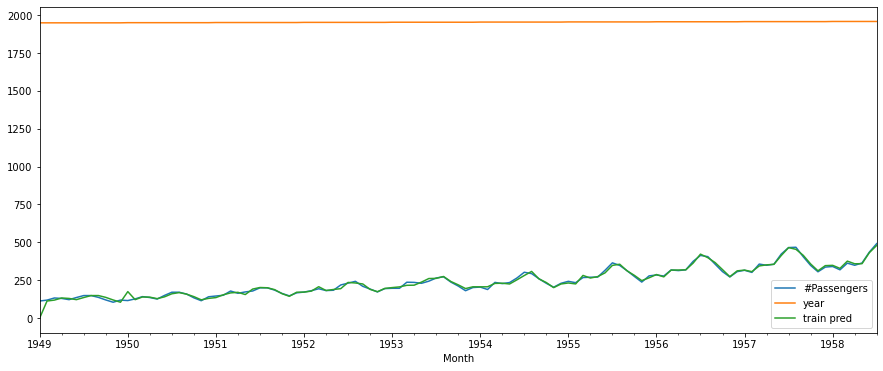

In [39]:
#prediction
start = 0
end = len(train)-1
train_pred = result.predict(start,end)
train.plot(label = 'train',legend = True)
train_pred.plot(label = 'train pred',legend = True)

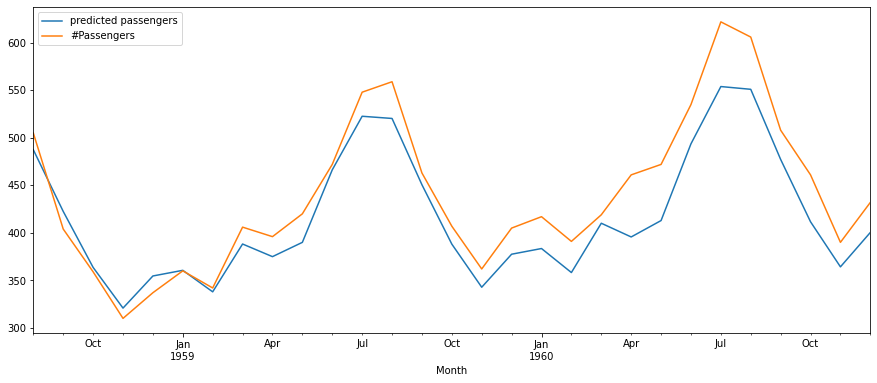

In [40]:
start_ind = len(train)
end_ind = len(data) - 1
predict = result.predict(start_ind,end_ind).rename('predicted passengers')

predict.plot(legend=True)
test['#Passengers'].plot(legend = True)
train[]

In [171]:
test['#Passengers'].plot(legend = True)
train['#Passengers'].plot(legend = True)
predict.plot(legend=True)


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [44]:
import math
from sklearn.metrics import mean_squared_error
trainscore = math.sqrt(mean_squared_error(train['#Passengers'],train_pred))
print("for trainin data",trainscore)
testscore = math.sqrt(mean_squared_error(test['#Passengers'],predict))
print('for test data', testscore)

for trainin data 15.114418778089671
for test data 32.70337285880061


In [31]:
train_log= np.log10(train['#Passengers'])


In [53]:
mean_absolute_percentage_error(test['#Passengers'],predict)

5.932988713377931

In [52]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [54]:
model_data.params

{'smoothing_level': 0.8442995742563313,
 'smoothing_slope': 9.525739683887828e-38,
 'smoothing_seasonal': 0.0,
 'damping_slope': nan,
 'initial_level': 201.97842725789653,
 'initial_slope': 3.7035836567372806,
 'initial_seasons': array([0.55096983, 0.53290731, 0.6192745 , 0.60172077, 0.59931439,
        0.67766996, 0.74870749, 0.73734303, 0.64466839, 0.55665029,
        0.48125201, 0.53780726, 0.54093229, 0.51708956, 0.58747726,
        0.56299429, 0.57081701, 0.66759763, 0.73961046, 0.72426135,
        0.63148013, 0.54636817, 0.47882292, 0.53882092]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

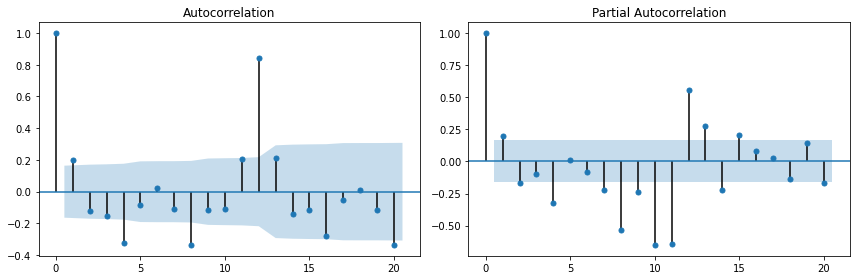

In [57]:
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(data_log_diff, lags=20, ax=axes[0])
smt.graphics.plot_pacf(data_log_diff, lags=20, ax=axes[1])
plt.tight_layout()

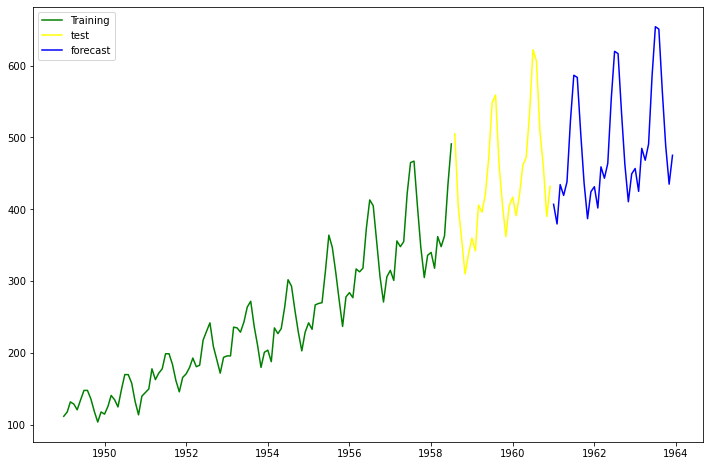

In [51]:
#forecast for next 3 years
forecast = result.predict(start = len(data),end = (len(data)-1) + 3*12,typ = 'levels').rename('Forecast')


plt.figure(figsize= (12,8))
plt.plot(train['#Passengers'],label = 'Training',color = 'green')
plt.plot(test['#Passengers'],label = 'test',color = 'yellow')
plt.plot(forecast,label = 'forecast',color = 'blue')
plt.legend(loc = 'left corner')
plt.show()



## multilayer perceptron Regression

In [252]:
from keras.models import Sequential
from keras.layers import Dense

In [253]:
data2 = pd.read_csv('AirPassengers.csv',usecols = [1])

dataset = data2.values
dataset = dataset.astype('float32')

In [254]:
# split into train and test sets
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

115 29


In [255]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [256]:
# reshape into X=t and Y=t+1
look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
trainX.shape

(104, 10)

In [257]:
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(64, input_dim=look_back, activation='relu'))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=2)

Epoch 1/200
52/52 - 0s - loss: 16153.3740
Epoch 2/200
52/52 - 0s - loss: 1328.3329
Epoch 3/200
52/52 - 0s - loss: 1279.2368
Epoch 4/200
52/52 - 0s - loss: 1720.7800
Epoch 5/200
52/52 - 0s - loss: 1180.7915
Epoch 6/200
52/52 - 0s - loss: 1058.3386
Epoch 7/200
52/52 - 0s - loss: 943.1880
Epoch 8/200
52/52 - 0s - loss: 998.5154
Epoch 9/200
52/52 - 0s - loss: 1002.4908
Epoch 10/200
52/52 - 0s - loss: 862.9876
Epoch 11/200
52/52 - 0s - loss: 893.4112
Epoch 12/200
52/52 - 0s - loss: 874.6298
Epoch 13/200
52/52 - 0s - loss: 906.8295
Epoch 14/200
52/52 - 0s - loss: 740.8469
Epoch 15/200
52/52 - 0s - loss: 671.5069
Epoch 16/200
52/52 - 0s - loss: 688.1474
Epoch 17/200
52/52 - 0s - loss: 665.5089
Epoch 18/200
52/52 - 0s - loss: 617.3523
Epoch 19/200
52/52 - 0s - loss: 729.9847
Epoch 20/200
52/52 - 0s - loss: 679.4631
Epoch 21/200
52/52 - 0s - loss: 617.1418
Epoch 22/200
52/52 - 0s - loss: 561.5739
Epoch 23/200
52/52 - 0s - loss: 630.1611
Epoch 24/200
52/52 - 0s - loss: 669.4082
Epoch 25/200
52/5

Epoch 199/200
52/52 - 0s - loss: 132.8468
Epoch 200/200
52/52 - 0s - loss: 143.6151


In [258]:
# Estimate model performance
import math
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 104.84 MSE (10.24 RMSE)
Test Score: 563.06 MSE (23.73 RMSE)


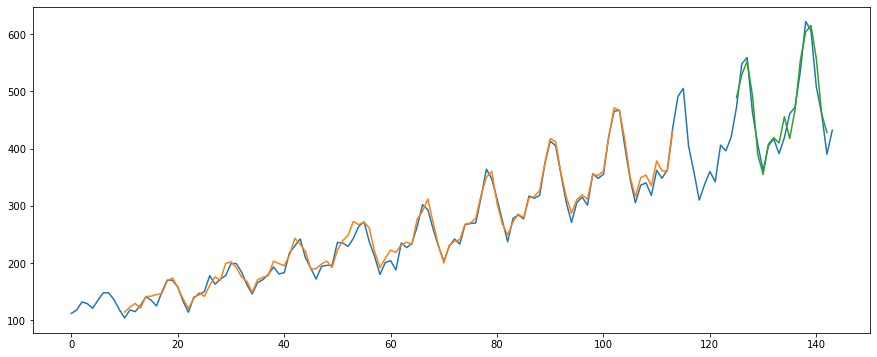

In [261]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(dataset,label = 'True')
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()



## LSTM

In [245]:
#reshape input to 3D - [sameples, time steps, features] for LSTM
# X_train = trainX.reshape(trainX.shape[0],trainX.shape[1], 1) # 108,10,1
# X_test = testX.reshape(testX.shape[0],testX.shape[1],1) #54,10,1
from sklearn.preprocessing import MinMaxScaler
dataframe = pd.read_csv('AirPassengers.csv',usecols = [1])
dataset = dataframe.values
dataset = dataset.astype('float32')
scaler = MinMaxScaler(feature_range = (0,1))
dataset = scaler.fit_transform(dataset)
train_size1 = int(len(dataset) * 0.66)
#print(train_size1)
test_size1 = len(dataset) - train_size1
train, test = dataset[0:train_size1,:], dataset[train_size1:len(dataset),:]
train.shape
# X_train = trainX.reshape(trainX.shape[0], 1,trainX.shape[1]) # 108,10,1
# X_test = testX.reshape(testX.shape[0],1,testX.shape[1])
# X_train.dtype

(95, 1)

In [246]:
def to_sequences(dataset, seq_size=1):
    x = []
    y = []

    for i in range(len(dataset)-seq_size-1):
        #print(i)
        window = dataset[i:(i+seq_size), 0]
        x.append(window)
        y.append(dataset[i+seq_size, 0])
        
    return np.array(x),np.array(y)
    

seq_size = 5  # Number of time steps to look back 
#Larger sequences (look further back) may improve forecasting.

trainX, trainY = to_sequences(train, seq_size)
testX, testY = to_sequences(test, seq_size)
testX.shape

(43, 5)

In [247]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
trainX.shape

(89, 1, 5)

In [231]:
## stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [248]:
model = Sequential()
model.add(LSTM(64,activation = 'relu',return_sequences = True,input_shape = (None,seq_size)))
model.add(LSTM(64,activation = 'relu',return_sequences = True))
model.add(LSTM(64,activation = 'relu'))
model.add(Dense(32))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error',optimizer = 'adam')


In [233]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_44 (LSTM)               (None, None, 64)          17920     
_________________________________________________________________
dense_34 (Dense)             (None, None, 32)          2080      
_________________________________________________________________
dense_35 (Dense)             (None, None, 1)           33        
Total params: 20,033
Trainable params: 20,033
Non-trainable params: 0
_________________________________________________________________


In [249]:
model.fit(trainX, trainY, validation_data=(testX, testY),verbose=2, epochs=100)

Epoch 1/100
3/3 - 1s - loss: 0.0621 - val_loss: 0.3586
Epoch 2/100
3/3 - 0s - loss: 0.0502 - val_loss: 0.3209
Epoch 3/100
3/3 - 0s - loss: 0.0392 - val_loss: 0.2835
Epoch 4/100
3/3 - 0s - loss: 0.0305 - val_loss: 0.2466
Epoch 5/100
3/3 - 0s - loss: 0.0234 - val_loss: 0.2113
Epoch 6/100
3/3 - 0s - loss: 0.0195 - val_loss: 0.1786
Epoch 7/100
3/3 - 0s - loss: 0.0178 - val_loss: 0.1514
Epoch 8/100
3/3 - 0s - loss: 0.0179 - val_loss: 0.1332
Epoch 9/100
3/3 - 0s - loss: 0.0187 - val_loss: 0.1259
Epoch 10/100
3/3 - 0s - loss: 0.0189 - val_loss: 0.1265
Epoch 11/100
3/3 - 0s - loss: 0.0183 - val_loss: 0.1334
Epoch 12/100
3/3 - 0s - loss: 0.0172 - val_loss: 0.1398
Epoch 13/100
3/3 - 0s - loss: 0.0166 - val_loss: 0.1464
Epoch 14/100
3/3 - 0s - loss: 0.0163 - val_loss: 0.1505
Epoch 15/100
3/3 - 0s - loss: 0.0159 - val_loss: 0.1480
Epoch 16/100
3/3 - 0s - loss: 0.0154 - val_loss: 0.1399
Epoch 17/100
3/3 - 0s - loss: 0.0147 - val_loss: 0.1265
Epoch 18/100
3/3 - 0s - loss: 0.0139 - val_loss: 0.1078
E

In [250]:
# ## trainsform to original form
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])


In [211]:
trainY.shape

(1, 84)

In [251]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 24.81 RMSE
Test Score: 54.90 RMSE
